### 0. 들어가기 전

#### 날짜 데이터 처리 변환

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta

In [2]:
today = datetime.now()
print(today)
print(today.year)

2021-10-14 15:19:39.025715
2021


In [3]:
today + timedelta(days = 10)

datetime.datetime(2021, 10, 24, 15, 19, 39, 25715)

In [4]:
today + timedelta(weeks = 3)

datetime.datetime(2021, 11, 4, 15, 19, 39, 25715)

In [7]:
# timedelta를 사용해서 months는 계산할 수 없음
# today + timedelta(months = 2)

# relativedelta 함수 이용하면 계산 가능
from dateutil.relativedelta import relativedelta
relativedelta(months=1)

relativedelta(months=+1)

In [8]:
# 월-일-년도 기준이라면 python에서 기본으로 인식
data = pd.DataFrame({'date': ['11-1-2020 1:1:11', '11-2-2020 2:11:11', '11-3-2020 3:11:11'], 'value':[10, 20, 30]})
data['date'] = pd.to_datetime(data['date'])
data

,date,value
0,2020-11-01 01:01:11,10
1,2020-11-02 02:11:11,20
2,2020-11-03 03:11:11,30


In [9]:
# 날짜 형태가 다르다면 fotmat으로 형태 지정해서 사용
data = pd.DataFrame({'date': ['10-11-10', '10-11-11', '10-11-12'], 'value':[10, 20, 30]})
data['date'] = pd.to_datetime(data['date'], format='%y-%m-%d')
data

,date,value
0,2010-11-10,10
1,2010-11-11,20
2,2010-11-12,30


### 2. 예제 데이터 실습

In [10]:
getdir = os.getcwd()
data = pd.read_excel(getdir+'/data/Superstore.xls')
data = data[['Order Date', 'Ship Date', 'Sales', 'Profit']]
display(data.head())
print(data.info())

,Order Date,Ship Date,Sales,Profit
0,2016-11-08,2016-11-11,261.9600,41.9136
1,2016-11-08,2016-11-11,731.9400,219.5820
2,2016-06-12,2016-06-16,14.6200,6.8714
3,2015-10-11,2015-10-18,957.5775,-383.0310
4,2015-10-11,2015-10-18,22.3680,2.5164


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Ship Date   9994 non-null   datetime64[ns]
 2   Sales       9994 non-null   float64       
 3   Profit      9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 312.4 KB
None


In [11]:
data['gap'] = data['Ship Date']-data['Order Date']

In [12]:
from sklearn.linear_model import LinearRegression

X = data[['Profit', 'gap']]
y = data['Sales']
print(X.info())

model = LinearRegression()

# time 형태의 값은 분석시 에러발생
model.fit(X, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   Profit  9994 non-null   float64        
 1   gap     9994 non-null   timedelta64[ns]
dtypes: float64(1), timedelta64[ns](1)
memory usage: 156.3 KB
None


TypeError: The DTypes <class 'numpy.dtype[timedelta64]'> and <class 'numpy.dtype[float64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

##### 해결 방법1

In [14]:
X['gap'] = X['gap'].apply(lambda x:x.days)

model.fit(X, y)

C:\Users\EunHye\AppData\Local\Temp/ipykernel_1244/3886242196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gap'] = X['gap'].apply(lambda x:x.days)


LinearRegression()

In [15]:
model.predict(X)

array([248.5051552 , 474.93985046, 202.01637137, ..., 216.14692021,
       208.40675263, 284.40140338])

##### 해결 방법2

In [16]:
data = pd.read_excel(getdir+'/data/Superstore.xls')
data = data[['Order Date', 'Ship Date', 'Sales', 'Profit']]
display(data.head())

pd.to_numeric(data['Order Date'])/10**9

,Order Date,Ship Date,Sales,Profit
0,2016-11-08,2016-11-11,261.9600,41.9136
1,2016-11-08,2016-11-11,731.9400,219.5820
2,2016-06-12,2016-06-16,14.6200,6.8714
3,2015-10-11,2015-10-18,957.5775,-383.0310
4,2015-10-11,2015-10-18,22.3680,2.5164


0       1.478563e+09
1       1.478563e+09
2       1.465690e+09
3       1.444522e+09
4       1.444522e+09
            ...     
9989    1.390262e+09
9990    1.488067e+09
9991    1.488067e+09
9992    1.488067e+09
9993    1.493856e+09
Name: Order Date, Length: 9994, dtype: float64

In [17]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [18]:
data['Order Date'] = pd.to_numeric(data['Order Date'])/10**9
data['Ship Date'] = pd.to_numeric(data['Ship Date'])/10**9

data['gap'] = data['Ship Date']-data['Order Date']

X = data[['Profit', 'gap']]
y = data['Sales']

model = LinearRegression()

model.fit(X, y)

LinearRegression()

#### 2-1) 알고리즘 비교

##### 2-1-1) fbprophet

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
getdir = os.getcwd()
data = pd.read_excel(getdir+'/data/Superstore.xls', index_col = 0)
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,262,2,0,42
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732,3,0,220
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15,2,0,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958,5,0,-383
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,2,0,3


In [21]:
data[['Postal Code', 'Sales', 'Discount', 'Profit']].describe()

,Postal Code,Sales,Discount,Profit
count,9994,9994,9994,9994
mean,55190,230,0,29
std,32064,623,0,234
min,1040,0,0,-6600
25%,23223,17,0,2
50%,56430,54,0,9
75%,90008,210,0,29
max,99301,22638,1,8400


In [22]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [23]:
data = data[['Order Date', 'Sales']].sort_values(by=['Order Date'])
data = data.groupby('Order Date').sum()
data.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1237, freq=None)

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

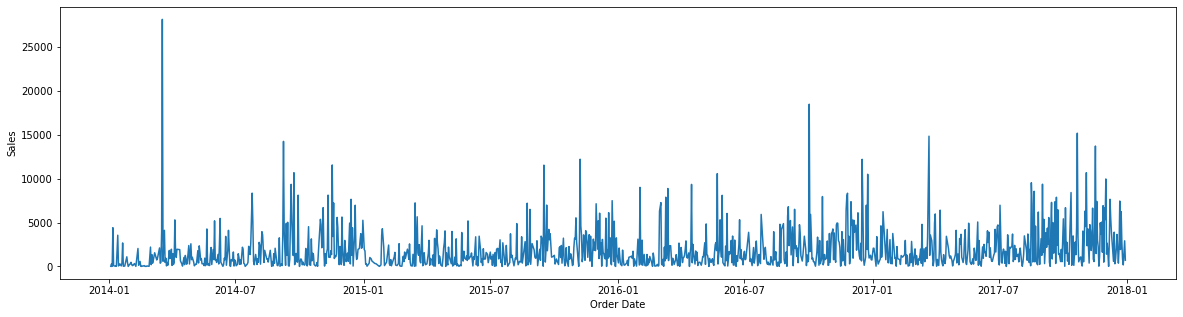

In [25]:
plt.figure(figsize = (20, 5))
sns.lineplot(x = data.index, y = data['Sales'])

In [ ]:
# 위의 형태로는 일별 추세를 확인하기 어렵기 때문에 주, 월단위로 묶어서 확인할 수 있음

In [26]:
# 최종 데이터셋
data = data.resample('MS').sum()

<AxesSubplot:xlabel='Order Date'>

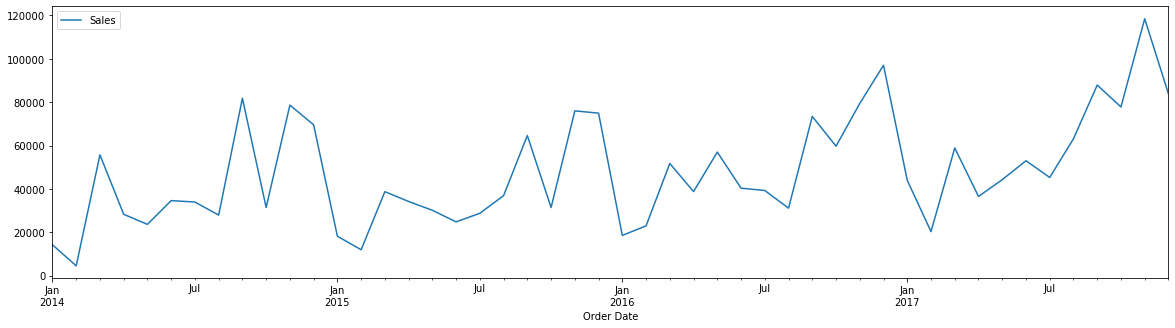

In [28]:
data.plot(figsize=(20, 5))

In [31]:
from fbprophet import Prophet

In [29]:
df = data.reset_index()

# prophet 알고리즘은 컬럼명을 ds, y로 지정해줘야하는 특징이 있음
df.columns = ['ds', 'y']

df.head()

,ds,y
0,2014-01-01,14237
1,2014-02-01,4520
2,2014-03-01,55691
3,2014-04-01,28295
4,2014-05-01,23648


In [33]:
model = Prophet()
model.fit(df)

# predict시엔 별도의 test set이 필요없이 기간 설정으로 가능
future = model.make_future_dataframe(periods = 12, freq = 'MS')
pred = model.predict(future)

pred = pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
pred.head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-01-01,16956,8511,25630
1,2014-02-01,3735,-4297,12660
2,2014-03-01,42558,33431,50770
3,2014-04-01,26439,18084,34890
4,2014-05-01,26643,17855,35632


<Figure size 1440x216 with 0 Axes>

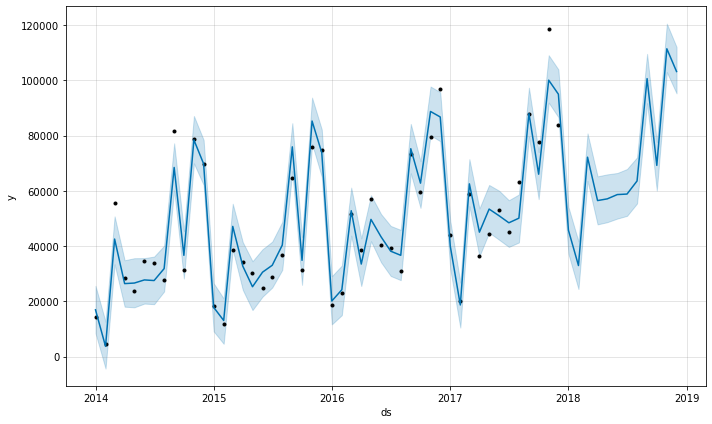

In [35]:
# 모델 자체적인 plot 기능이 있음
model.plot(pred)
plt.show()

##### test set과 예측결과 비교하여 plot

In [44]:
new_df = data[:'2016']
new_df = new_df.reset_index()
new_df.columns = ['ds', 'y']

model = Prophet()
model.fit(new_df)

future = model.make_future_dataframe(periods = 12, freq = 'MS')
pred = model.predict(future)
pred = pred[['ds', 'yhat']]
pred.set_index('ds', inplace=True)
pred = pred['2017':]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='ds'>

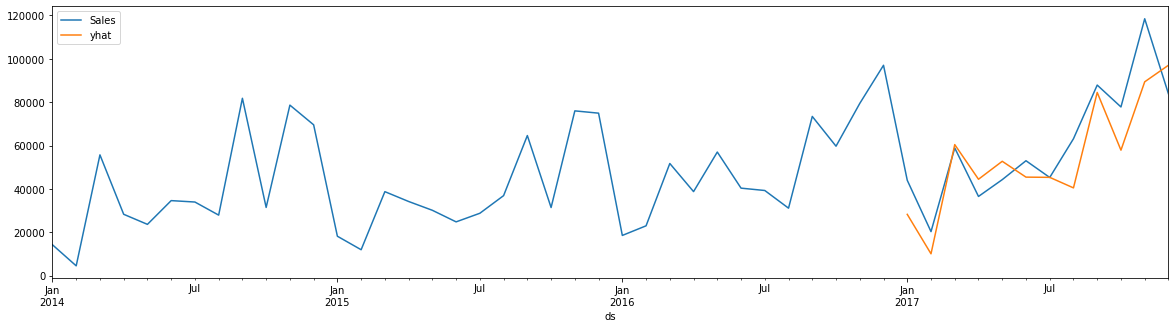

In [45]:
ax = data.plot()
pred.plot(ax=ax, figsize = (20, 5))

##### prophet 모델 특징
- Trend, Weakly, Yearly 추세 확인 가능

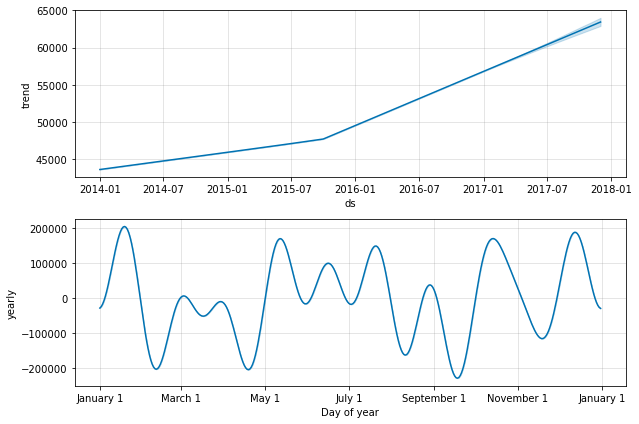

In [46]:
pred = model.predict(future)

model.plot_components(pred)
plt.show()

##### 2-1-2) AR 알고리즘(AutoRegression)

In [47]:
data = data.resample('MS').mean()
new_df = data[:'2016']

In [48]:
from statsmodels.tsa.ar_model import AutoReg


model = AutoReg(new_df, lags = 12)
model_fit = model.fit()

C:\Users\EunHye\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [49]:
pred = model_fit.predict(start = len(new_df), end = len(new_df)+11) # start, end에는 행번호로 입력

<AxesSubplot:xlabel='Order Date'>

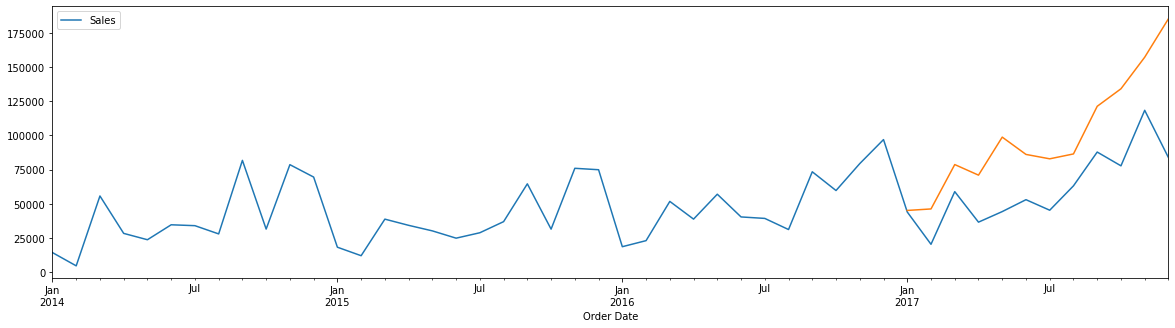

In [50]:
ax = data.plot()
pred.plot(ax=ax, figsize=(20, 5))